In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data Overview

## Loading data for 1 stock symbol: Microsoft Corp.

In [6]:
# Import data
symbl = 'MSFT'

apiKey = 'DG33STQB6CAUHK3B'

# Historical Data
msft = pd.read_csv('https://www.alphavantage.co/query?datatype=csv&function=TIME_SERIES_WEEKLY&symbol=' + symbl + '&outputsize=compact&apikey=' + apiKey)

# Check top 10 rows
msft.head(10)

,timestamp,open,high,low,close,volume
0,2019-03-26,116.56,118.705,116.3224,117.91,53053327
1,2019-03-22,116.17,120.820,116.0500,117.05,160388610
2,2019-03-15,110.99,117.250,110.9800,115.91,173532134
3,2019-03-08,113.02,113.250,108.8000,110.51,111990712
4,2019-03-01,111.76,113.240,110.8800,112.53,119359497
5,2019-02-22,107.79,111.200,106.2900,110.97,96472580
6,2019-02-15,106.20,108.300,104.9650,108.22,110757176
7,2019-02-08,102.87,107.270,102.7700,105.67,130472196
8,2019-02-01,106.26,106.480,102.1700,102.78,201611213
9,2019-01-25,106.75,107.880,104.8600,107.17,112628578


In [7]:
# Check last 10 rows
msft.tail(10)

,timestamp,open,high,low,close,volume
1098,1998-03-13,82.50,83.00,79.50,82.37,55001400
1099,1998-03-06,85.87,85.87,79.25,82.75,79005300
1100,1998-02-27,80.94,86.00,79.37,84.75,95642150
1101,1998-02-20,158.50,158.50,152.88,155.13,40268500
1102,1998-02-13,158.75,160.06,155.63,157.50,37262800
1103,1998-02-06,151.75,158.75,150.50,158.13,42349700
1104,1998-01-30,139.88,150.13,138.45,149.19,46856000
1105,1998-01-23,134.13,139.88,134.00,138.25,46621800
1106,1998-01-16,124.62,135.38,124.37,135.25,40459900
1107,1998-01-09,131.25,133.63,125.87,127.00,46857300


In [8]:
msft.describe()

,open,high,low,close,volume
count,1108.000000,1108.000000,1108.000000,1108.000000,1.108000e+03
mean,49.572761,51.086521,48.170989,49.753644,2.282001e+08
std,29.786246,30.949361,28.744406,30.091979,1.169467e+08
min,15.200000,16.400000,14.870000,15.280000,2.801630e+07
25%,27.057500,27.610000,26.600000,27.135000,1.409427e+08
50%,35.550000,36.176250,34.300000,35.670000,2.116461e+08
75%,64.930000,66.230000,63.352500,64.957500,2.956824e+08
max,175.440000,180.380000,163.130000,178.130000,8.797232e+08


In [9]:
msft.dtypes

timestamp     object
open         float64
high         float64
low          float64
close        float64
volume         int64
dtype: object

In [10]:
msft.shape

(1108, 6)

## Plotting our original data


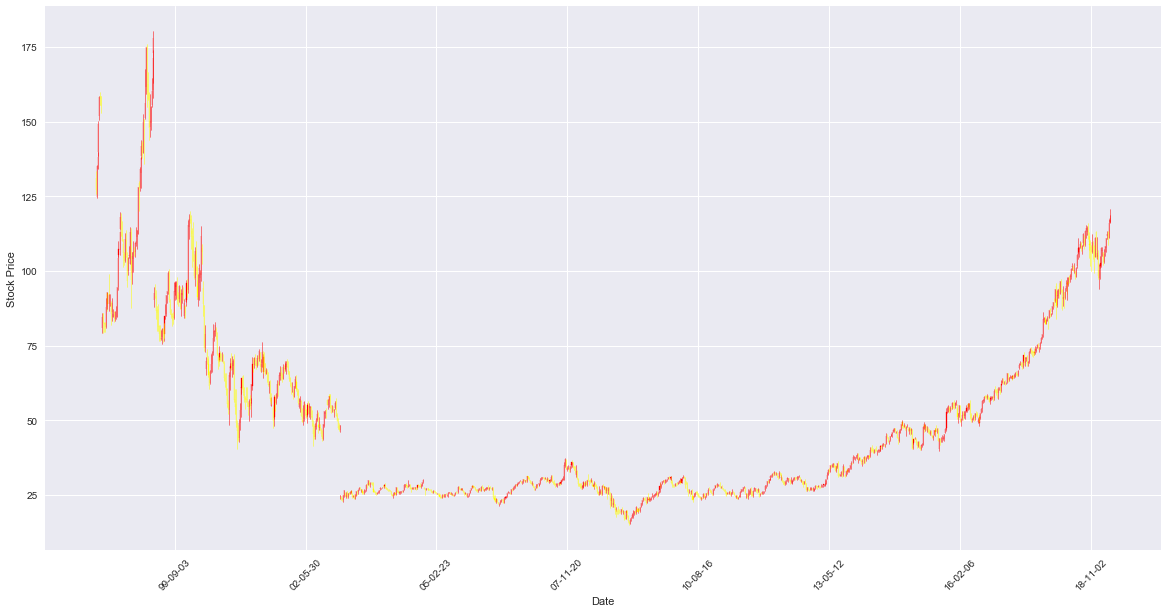

In [92]:
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc # Represent the open, close as a bar line and high low range as a vertical line.
from datetime import date
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)

plt.figure(figsize=(20,10))
msft_1 = msft.copy()
msft_1.timestamp = date2num(pd.to_datetime(msft_1.timestamp).dt.to_pydatetime())
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1,msft_1.values, width=0.5, colorup='red', colordown='yellow')
x_range = np.arange(msft_1.shape[0])
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.grid(True)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

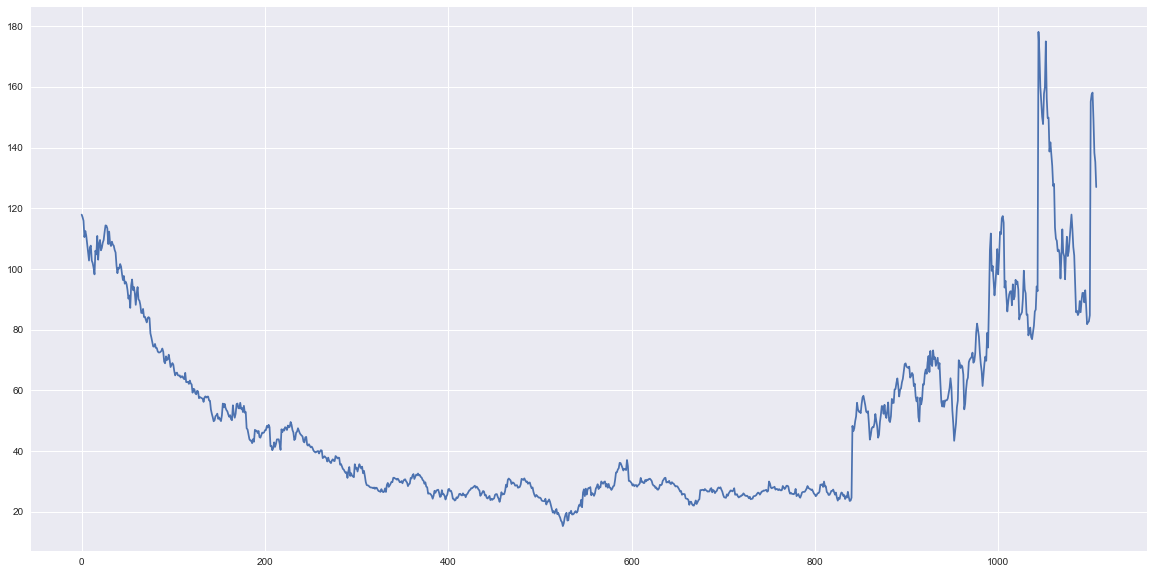

In [93]:
# Plotting closing price
plt.plot(msft.close, label='Close Price history')

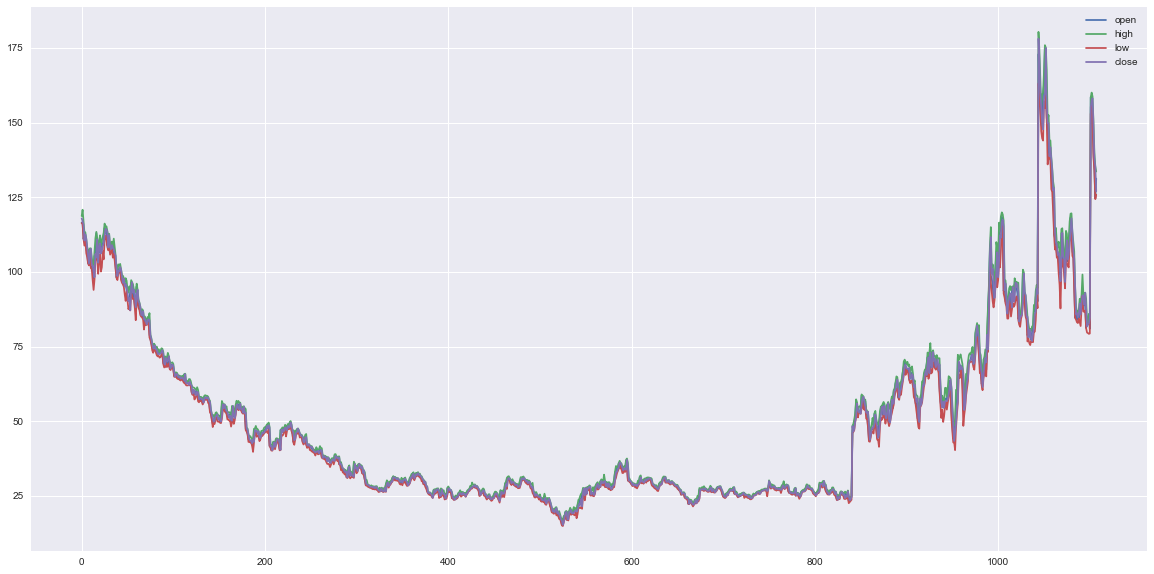

In [94]:
msft.plot(kind = "line", y = ['open', 'high', 'low','close'])

In [69]:
msft['months'] = pd.DatetimeIndex(msft['timestamp']).month
msft['year'] = pd.DatetimeIndex(msft['timestamp']).year
msft.head()

,timestamp,open,high,low,close,volume,months,year
0,2019-03-26,116.56,118.705,116.3224,117.91,53053327,3,2019
1,2019-03-22,116.17,120.820,116.0500,117.05,160388610,3,2019
2,2019-03-15,110.99,117.250,110.9800,115.91,173532134,3,2019
3,2019-03-08,113.02,113.250,108.8000,110.51,111990712,3,2019
4,2019-03-01,111.76,113.240,110.8800,112.53,119359497,3,2019


In [89]:
msftPivot = pd.pivot_table(msft, values = "close", columns = "year", index = "months")
msftPivot

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
months,,,,,,,,,,,,,,,,,,,,,
1,137.4225,157.7200,106.4225,56.9075,66.8525,51.6960,27.8100,26.1550,27.0750,30.640000,...,29.665000,28.167750,28.82375,27.17500,36.79500,45.55400,52.6750,63.5150,90.4625,104.9025
2,138.8775,153.9075,98.2175,58.5000,60.3825,35.8025,26.6925,25.7550,26.8900,29.202500,...,28.347500,27.157500,30.86625,27.81250,37.61750,43.49625,50.9450,64.2300,91.5050,106.9100
3,83.6850,166.1125,102.8860,55.8380,61.7140,24.9150,25.3475,24.7125,27.1640,27.652000,...,29.276875,25.513125,32.18600,28.16800,39.01500,41.89750,53.2000,64.9780,92.5280,114.7820
4,91.5600,88.1740,77.9675,63.6225,55.1250,25.0025,26.0320,24.7600,26.4050,29.075000,...,30.333000,25.672000,31.68250,29.76125,39.74975,42.87375,53.4580,66.3725,93.5325,NaN
5,87.0360,78.5450,66.6075,69.7875,51.9620,25.3720,25.9400,25.5825,23.3125,30.690000,...,27.445000,25.037500,30.11750,34.04380,40.02400,47.69200,51.1025,68.7575,96.8950,NaN
6,92.7825,81.9050,73.0740,70.6760,53.5525,25.0700,27.4100,25.2350,22.5380,30.018000,...,25.605625,24.042500,29.88200,34.47000,41.66000,45.86750,50.8075,70.4440,100.3140,NaN
7,112.4260,92.1500,75.7350,68.0125,50.4050,26.8975,28.0860,25.3760,23.4275,30.085025,...,24.810000,26.930000,29.86125,33.22500,43.27000,45.65400,54.0820,72.2675,105.1350,NaN
8,106.4975,86.6075,70.7950,62.6780,48.7660,26.0060,27.2050,27.1250,25.0900,28.692020,...,24.527500,25.020000,30.49000,32.90800,44.28600,45.18500,57.8875,72.6225,109.0700,NaN
9,104.8250,94.5625,65.4500,53.4650,47.1100,28.7175,27.3500,26.1340,26.4600,28.897475,...,24.533750,25.722000,30.77750,32.56075,46.63375,43.37750,57.2320,74.4260,112.5525,NaN


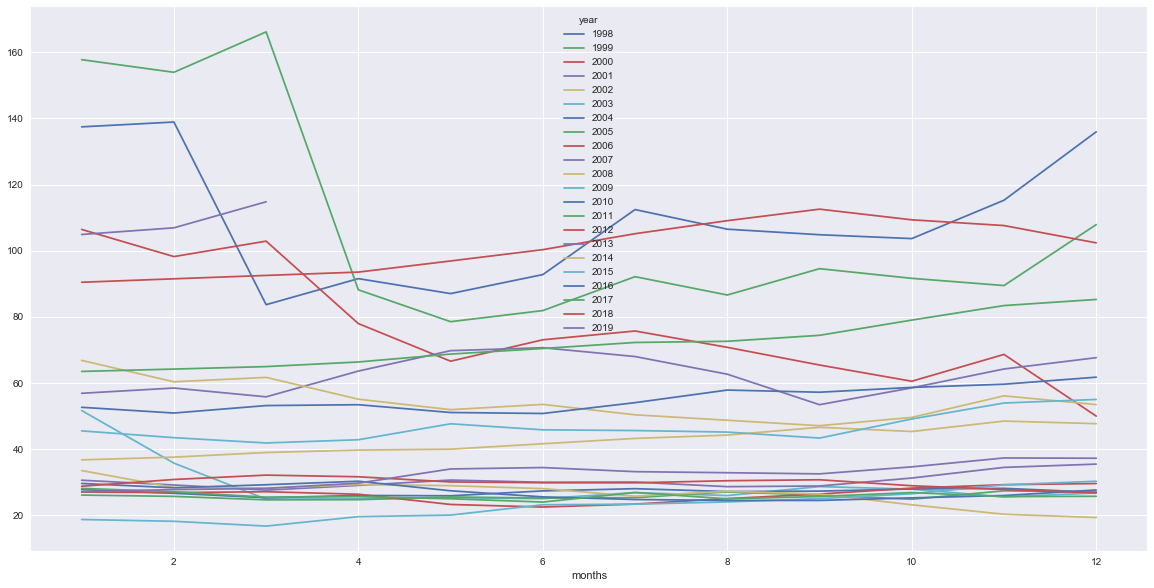

In [95]:
msftPivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1614797f0>,
      dtype=object)

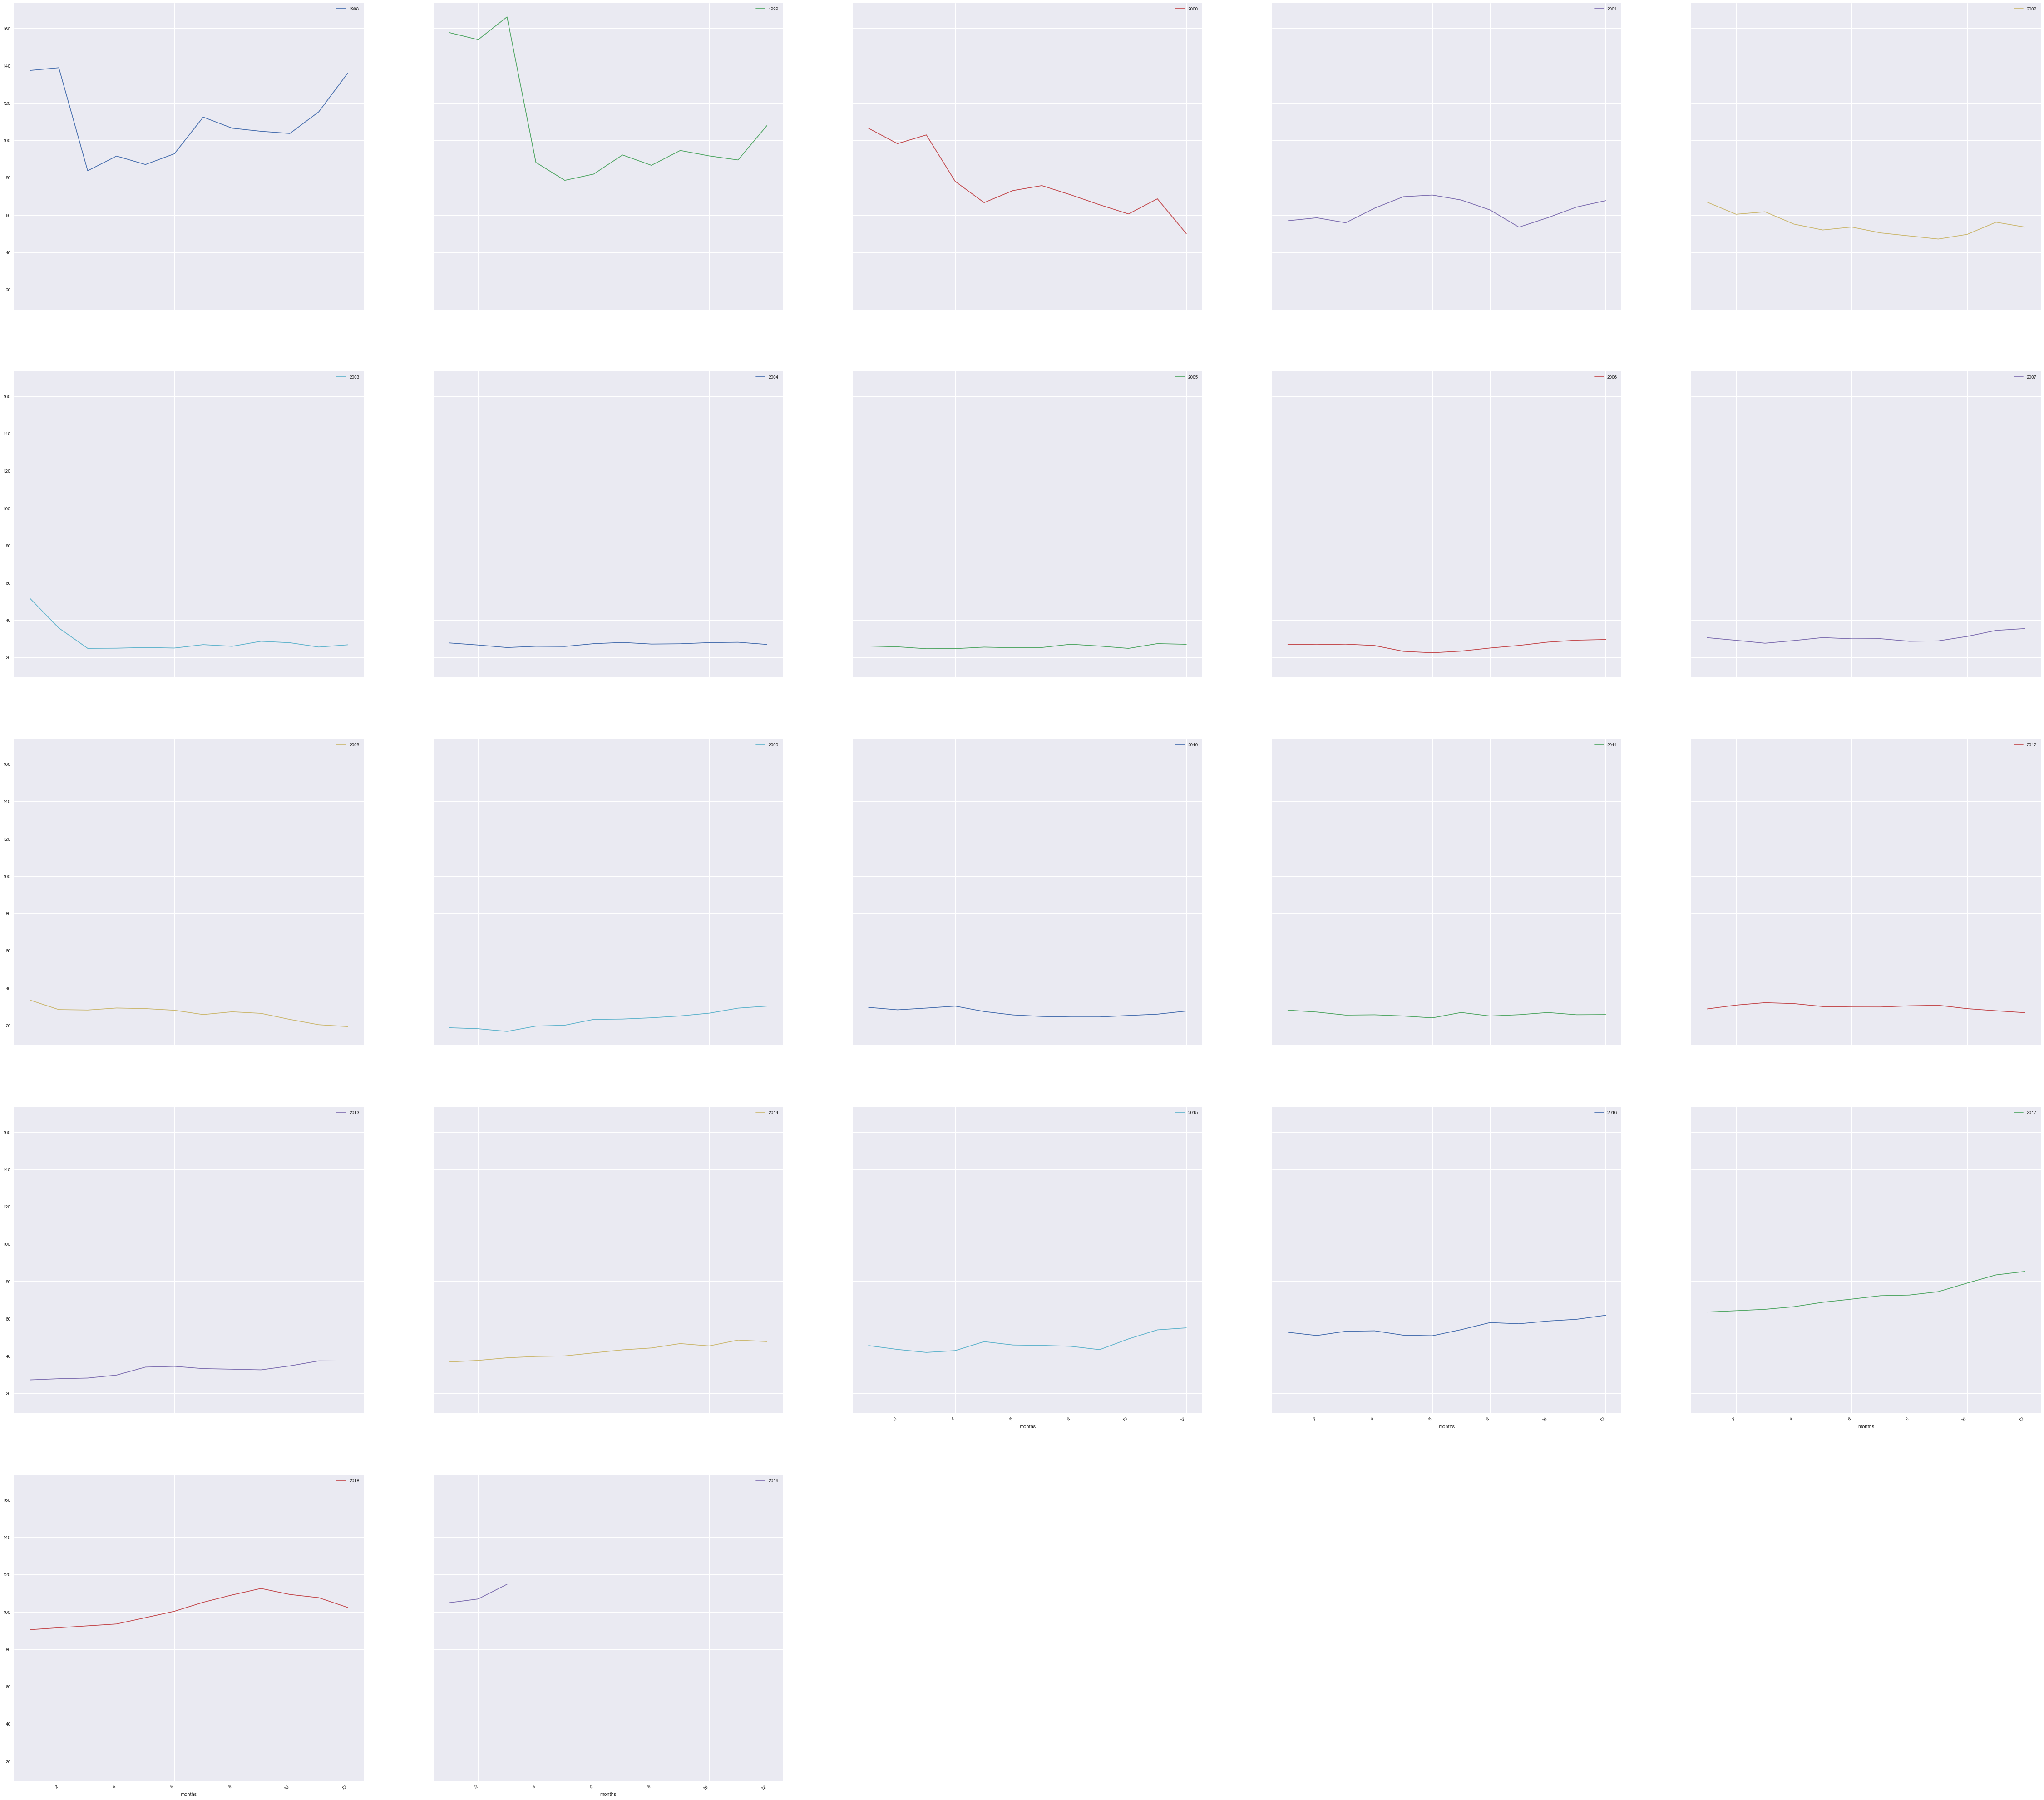

In [96]:
msftPivot.plot(subplots = True, figsize=(80, 80), layout=(5,5), sharey=True)

In [97]:
#Split dataset into test and train portion
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(msft, test_size=0.2, random_state=42)

In [98]:
train_set.shape

(886, 8)

In [116]:
train_set = train_set.apply(pd.to_numeric, errors='coerce')
test_set = test_set.apply(pd.to_numeric, errors='coerce')
# fill NaN with 0
train_set.fillna(0, inplace=True)
test_set.fillna(0, inplace=True)

In [99]:
test_set.shape

(222, 8)

In [117]:
x_train = train_set.drop('close', axis=1)
y_train = train_set['close']
x_test = test_set.drop('close', axis=1)
y_test = test_set['close']

## Linear Regression

In [118]:
#implement linear regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
#make predictions and find the rmse
preds = linear_model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

0.9603546485080066

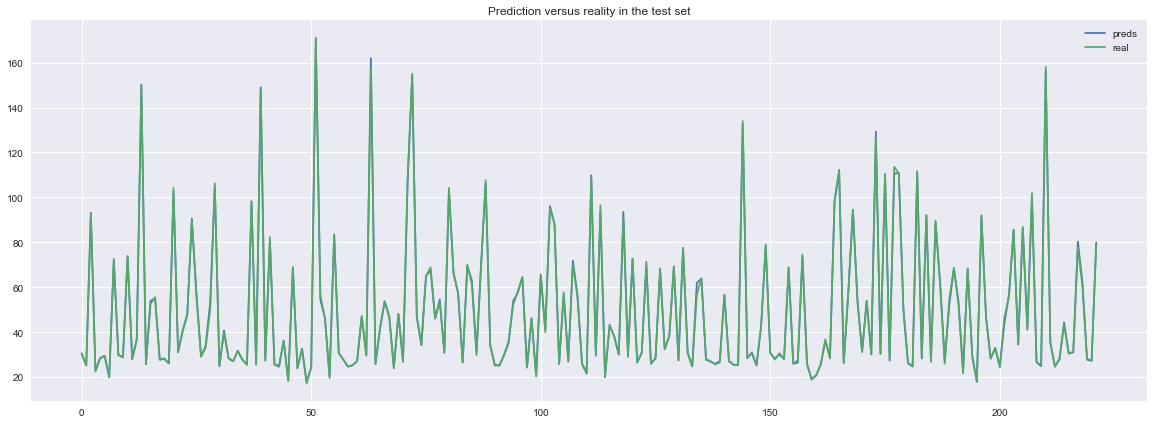

In [123]:
plt.figure(figsize=(20,7))
plt.plot(np.arange(len(preds)), preds, label='preds')
plt.plot(np.arange(len(y_test)), y_test, label='real' );
plt.title('Prediction versus reality in the test set')
plt.legend();

In [168]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

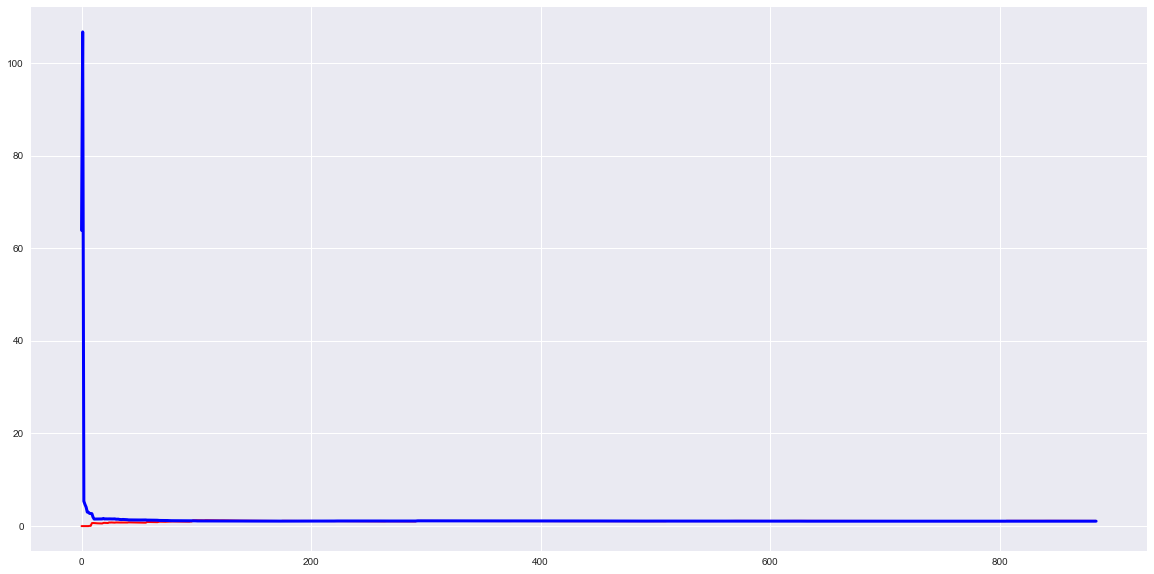

In [170]:
msft_1= msft.apply(pd.to_numeric, errors='coerce')
msft_1.fillna(0, inplace=True)
x= msft_1.drop('close', axis=1)
y=msft_1['close']
plot_learning_curves(linear_model, x, y)